# Dan Crowley & Wyatt Madden - Lab 6 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from im2rgb import *
from rgb2im import *
from pointclouds import *
from pointrings import *
random.seed(1)

## 1

In [2]:
# K-Means
#  Separate data points into K clusters with no other information.
# Inputs:
#  X - D-by-N matrix of N points in D dimensions.
#  K - Integer number of clusters to detect.
# Outputs:
#  mu - D-by-K matrix with the learned cluster centroids.
#  labels - Length N vector with integer (1, 2, ..., K) class assignments.

import random
import numpy as np

def km(X, K):
    #set first K centroids at random data points
    centroids = X.loc[random.sample(range(0, X.shape[0]), K)]
    
    #calculate first set of assignments to nearest centroid
    centroid_dist = np.empty((X.shape[0], K))
    for i in range(0, K):
        dist_from_i_centroid = np.sqrt(np.sum((X.loc[:,("x", "y")] - centroids.iloc[i])**2, axis = 1))
        centroid_dist[:, i] = dist_from_i_centroid
    X['centroid'] = np.argmin(centroid_dist, axis = 1)
    
    #recalculate centroids and reassign until stable
    while True:
        centroids = X.groupby('centroid').agg({'x': 'mean', 'y': 'mean'})
        for i in range(0, K):
            dist_from_i_centroid = np.sqrt(np.sum((X.loc[:,("x", "y")] - centroids.iloc[i])**2, axis = 1))
            centroid_dist[:, i] = dist_from_i_centroid
        X['centroid_new'] = np.argmin(centroid_dist, axis = 1)
        #check if centroid assignments didn't change
        if sum(X['centroid_new'] == X['centroid']) == X.shape[0]:
            break
        X['centroid'] = X['centroid_new']
        
    mu = centroids
    labels = X['centroid']
    
    return mu, labels


## 2

In [3]:
temp_cloud = pointclouds()
pc = pd.DataFrame(temp_cloud[0], columns = ("x", "y"))
pc["cluster"] = temp_cloud[1]

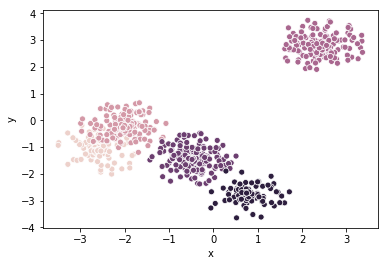

In [4]:
sns.scatterplot(x = "x", y = "y", hue = "cluster", data=pc, legend = False)

We see the five clusters, colored by the true centroid from which they were generated. We now cluster these with the K-means algorithm below, and plot the same points with shapes indicating which clusters the K-means assigned them to.  

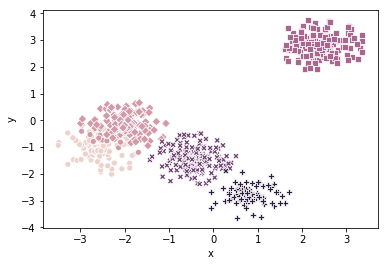

In [5]:
temp_km = km(pc, 5)
pc["label"] = temp_km[1]
sns.scatterplot(x = "x", y = "y", hue = "cluster", style = "label", data=pc, legend = False)

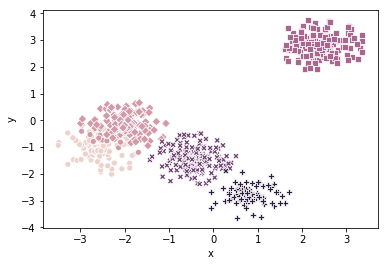

In [6]:
sns.scatterplot(x = "x", y = "y", hue = "cluster", style = "label", data=pc, legend = False)

We see that except for where there is some overlap in groups, the k-means perform very well. 

# 3

In [7]:
def gen_km(dat):
    pc = pd.DataFrame(dat[0], columns = ("x", "y"))
    pc["cluster"] = dat[1]
    temp_km = km(pc, 5)
    pc["label"] = temp_km[1]
    sns.scatterplot(x = "x", y = "y", hue = "cluster", style = "label", data=pc, legend = False)


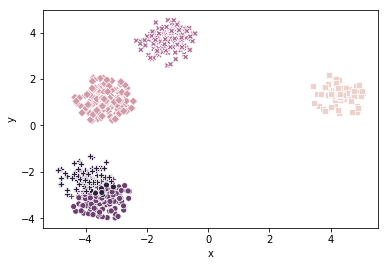

In [8]:
gen_km(pointclouds())

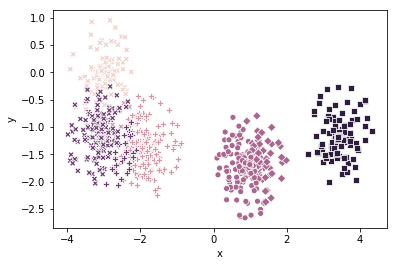

In [9]:
gen_km(pointclouds())

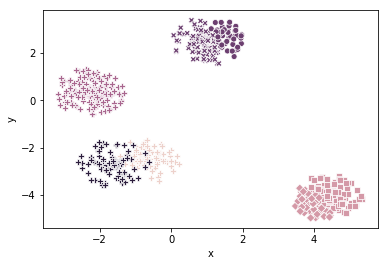

In [10]:
gen_km(pointclouds())

# 4

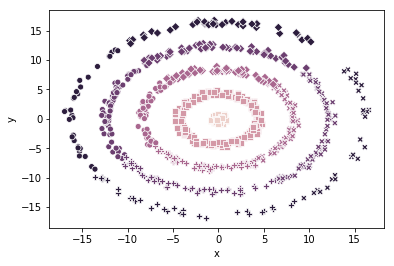

In [11]:
gen_km(pointrings())

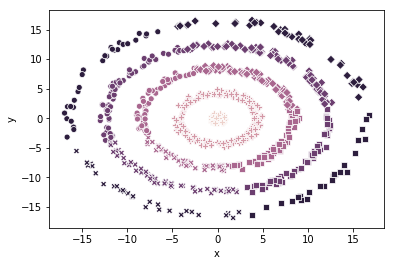

In [12]:
gen_km(pointrings())

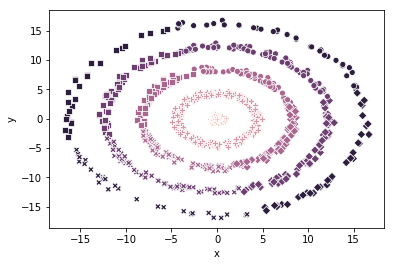

In [13]:
gen_km(pointrings())

# 5

Clearly the data sets generated from pointclouds are classified much better than the data sets generated from pointrings. This makes sense, as k-means learns centroids, and each of the rings generated from pointrings have identical centroid. Therefore they are not separable according to centroids. If we extended k-means to instead learn distance from centroid, it may perform better on the pointrings data set. 

# 6

In [14]:
temp_im = im2rgb('mountains_small.png')

In [15]:
pc = pd.DataFrame(np.transpose(temp_im[0]), columns = ("x", "y", "z"))

In [16]:
# K-Means
#  Separate data points into K clusters with no other information.
# Inputs:
#  X - D-by-N matrix of N points in D dimensions.
#  K - Integer number of clusters to detect.
# Outputs:
#  mu - D-by-K matrix with the learned cluster centroids.
#  labels - Length N vector with integer (1, 2, ..., K) class assignments.

import random
import numpy as np

def km_3dim(X, K):
    #set first K centroids at random data points
    centroids = X.loc[random.sample(range(0, X.shape[0]), K)]
    
    #calculate first set of assignments to nearest centroid
    centroid_dist = np.empty((X.shape[0], K))
    for i in range(0, K):
        dist_from_i_centroid = np.sqrt(np.sum((X.loc[:,("x", "y", "z")] - centroids.iloc[i])**2, axis = 1))
        centroid_dist[:, i] = dist_from_i_centroid
    X['centroid'] = np.argmin(centroid_dist, axis = 1)
    
    #recalculate centroids and reassign until stable
    while True:
        centroids = X.groupby('centroid').agg({'x': 'mean', 'y': 'mean', 'z': 'mean'})
        for i in range(0, K):
            dist_from_i_centroid = np.sqrt(np.sum((X.loc[:,("x", "y", "z")] - centroids.iloc[i])**2, axis = 1))
            centroid_dist[:, i] = dist_from_i_centroid
        X['centroid_new'] = np.argmin(centroid_dist, axis = 1)
        #check if centroid assignments didn't change
        if sum(X['centroid_new'] == X['centroid']) == X.shape[0]:
            break
        X['centroid'] = X['centroid_new']
        
    mu = centroids
    labels = X['centroid']
    
    return mu, labels

In [17]:
im_km = km_3dim(pc, 5)

/Users/wyattmadden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


# 7 

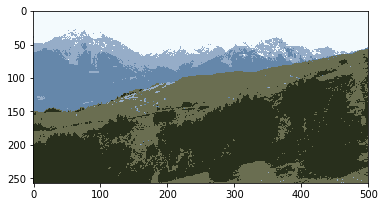

In [18]:
X = im_km[0].loc[im_km[1], ]

dims = temp_im[2]

I = 255.0 * np.reshape(np.array(X), [dims[0], dims[1], 3])

plt.imshow(I)

Not bad!

# Extra